In [1]:
from binance.client import Client
import pandas as pd
import time

# Initialize the Binance client
api_key = "sytvkKKUmXPabC877r7MFv7rhibYAMoczrMdTse0OSB6dRyImx1G8yEInE889y00"
api_secret = "KYgkq441X5spXpdDoLELwlcoJ3k7uh9LeXGgf7aQvABSMZl42Py3OUIwFCqVgc6L"
client = Client(api_key, api_secret)

def fetch_ohlcv_batch(client, symbol, interval, start_time, limit=1000):
    """
    Fetch a batch of OHLCV data from Binance.
    """
    try:
        candles = client.get_klines(
            symbol=symbol,
            interval=interval,
            startTime=start_time,
            limit=limit
        )
        # Transform data into desired format
        ohlcv = [
            [int(c[0]), float(c[1]), float(c[2]), float(c[3]), float(c[4]), float(c[5])]
            for c in candles
        ]
        return ohlcv
    except Exception as e:
        print(f"Error fetching data: {e}")
        return None

def fetch_historical_ohlcv(client, symbol, interval, start_time, limit=1000):
    """
    Fetch historical OHLCV data in batches from Binance.
    """
    all_data = []
    while True:
        data = fetch_ohlcv_batch(client, symbol, interval, start_time, limit)
        if data:
            # Append data to all_data
            all_data.extend(data)
            # Update `start_time` to the timestamp of the last fetched data point + 1 millisecond
            start_time = data[-1][0] + 1
            print(f"Fetched {len(data)} data points. Total so far: {len(all_data)}")
        else:
            print("No more data to fetch or an error occurred.")
            break

        # If the batch size is less than the limit, it means we reached the end of available data
        if len(data) < limit:
            print("Reached the end of available data.")
            break

        # To avoid rate limit issues, wait for a short while
        time.sleep(1)

    # Convert data to DataFrame
    df = pd.DataFrame(all_data, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    return df

# Usage example
if __name__ == "__main__":
    # Define parameters
    symbol = 'BTCUSDT'        # Symbol to fetch (without '/')
    interval = Client.KLINE_INTERVAL_1DAY  # Timeframe ('1m', '5m', '1h', '1d', etc.)
    start_time = int(pd.Timestamp("2007-01-01").timestamp() * 1000)  # Start date in milliseconds
    limit = 1000              # Max data points per batch

    # Fetch historical data
    df = fetch_historical_ohlcv(client, symbol, interval, start_time, limit)
    print(f"Total fetched data points: {len(df)}")
    print(df.head())

Fetched 1000 data points. Total so far: 1000
Fetched 1000 data points. Total so far: 2000
Fetched 723 data points. Total so far: 2723
Reached the end of available data.
Total fetched data points: 2723
   timestamp     open     high      low    close       volume
0 2017-08-17  4261.48  4485.39  4200.74  4285.08   795.150377
1 2017-08-18  4285.08  4371.52  3938.77  4108.37  1199.888264
2 2017-08-19  4108.37  4184.69  3850.00  4139.98   381.309763
3 2017-08-20  4120.98  4211.08  4032.62  4086.29   467.083022
4 2017-08-21  4069.13  4119.62  3911.79  4016.00   691.743060


In [2]:
df.head()

,timestamp,open,high,low,close,volume
0,2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377
1,2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264
2,2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763
3,2017-08-20,4120.98,4211.08,4032.62,4086.29,467.083022
4,2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060


In [3]:
df.tail()

,timestamp,open,high,low,close,volume
2718,2025-01-25,104870.51,105286.52,104106.09,104746.85,9068.32377
2719,2025-01-26,104746.86,105500.00,102520.44,102620.00,9812.51238
2720,2025-01-27,102620.01,103260.00,97777.77,102082.83,50758.13410
2721,2025-01-28,102082.83,103800.00,100272.68,101335.52,22022.05765
2722,2025-01-29,101335.52,102853.53,101328.01,102535.93,3196.15537


In [4]:
# Select all rows except the last one
df = df.iloc[:-1]

In [5]:
df.tail()

,timestamp,open,high,low,close,volume
2717,2025-01-24,103910.35,107120.00,102750.00,104870.50,23609.24017
2718,2025-01-25,104870.51,105286.52,104106.09,104746.85,9068.32377
2719,2025-01-26,104746.86,105500.00,102520.44,102620.00,9812.51238
2720,2025-01-27,102620.01,103260.00,97777.77,102082.83,50758.13410
2721,2025-01-28,102082.83,103800.00,100272.68,101335.52,22022.05765


In [6]:
df.columns

Index(['timestamp', 'open', 'high', 'low', 'close', 'volume'], dtype='object')

In [7]:
df_daily=df.copy()

In [8]:
df_daily

,timestamp,open,high,low,close,volume
0,2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377
1,2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264
2,2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763
3,2017-08-20,4120.98,4211.08,4032.62,4086.29,467.083022
4,2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060
...,...,...,...,...,...,...
2717,2025-01-24,103910.35,107120.00,102750.00,104870.50,23609.240170
2718,2025-01-25,104870.51,105286.52,104106.09,104746.85,9068.323770
2719,2025-01-26,104746.86,105500.00,102520.44,102620.00,9812.512380
2720,2025-01-27,102620.01,103260.00,97777.77,102082.83,50758.134100


In [9]:
countrows=len(df_daily)
countrows

2722

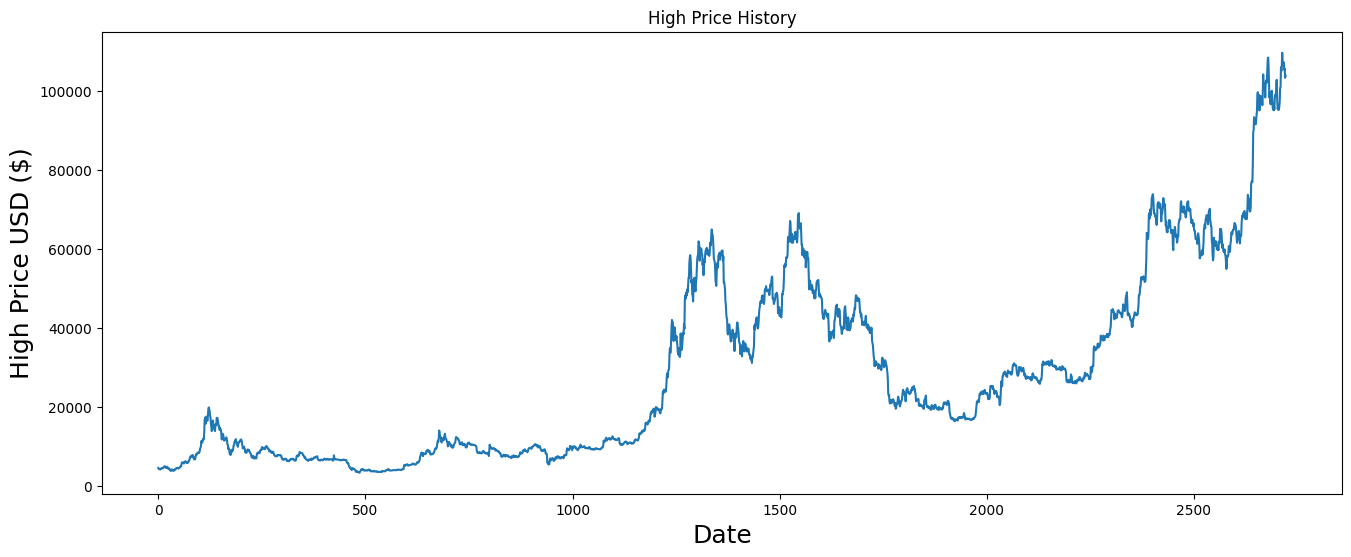

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,6))
plt.title('High Price History')
plt.plot(df_daily['high'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('High Price USD ($)', fontsize=18)
plt.show()

In [11]:
import numpy as np
# Create a new dataframe with only the High column 
data = df_daily.filter(['high'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2586

In [12]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01137121],
       [0.01030011],
       [0.00854273],
       ...,
       [0.96154696],
       [0.94047681],
       [0.94555622]])

In [13]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.01137121, 0.01030011, 0.00854273, 0.00879096, 0.00793066,
       0.00779144, 0.00930567, 0.01030161, 0.0110751 , 0.01025759,
       0.010568  , 0.01056631, 0.01269242, 0.01289616, 0.01381713,
       0.01513524, 0.01563979, 0.01352873, 0.01176721, 0.01136744,
       0.01304064, 0.0142232 , 0.01372279, 0.0108184 , 0.00946746,
       0.00995123, 0.01051711, 0.00836109, 0.00673963, 0.00545096,
       0.00633516, 0.00443706, 0.00796433, 0.00765176, 0.00723892,
       0.0059589 , 0.00445389, 0.0050859 , 0.00483005, 0.00661612,
       0.00658903, 0.00915649, 0.00962737, 0.00928742, 0.01037987,
       0.01062933, 0.01208834, 0.01120133, 0.01031403, 0.01014472,
       0.01072791, 0.0113158 , 0.01299483, 0.01517691, 0.01583554,
       0.01509818, 0.02035048, 0.02417114, 0.02467748, 0.02488724])]
[0.023632532698720274]

[array([0.01137121, 0.01030011, 0.00854273, 0.00879096, 0.00793066,
       0.00779144, 0.00930567, 0.01030161, 0.0110751 , 0.01025759,
       0.010568  , 0.01056631, 0.0

In [14]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2526/2526 [==============================] - 55s 21ms/step - loss: 7.9703e-04


In [15]:
# from keras.models import Sequential
# from keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional
# from keras.callbacks import EarlyStopping, LearningRateScheduler
# from keras.optimizers import Adam

# # Build the LSTM model with improvements
# model = Sequential()

# # Bidirectional LSTM layer
# model.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=(x_train.shape[1], 1)))
# model.add(Dropout(0.2))  # Dropout layer to prevent overfitting
# model.add(BatchNormalization())  # Batch normalization

# model.add(LSTM(64, return_sequences=False))
# model.add(Dropout(0.2))  # Dropout layer

# # Dense layer with 25 neurons
# model.add(Dense(25))

# # Output layer with 1 neuron (regression output)
# model.add(Dense(1))

# # Compile the model with a custom optimizer
# model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# # Implement EarlyStopping and LearningRateScheduler callbacks
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# lr_scheduler = LearningRateScheduler(lambda epoch, lr: lr * 0.1 if epoch % 10 == 0 and epoch != 0 else lr)

# # Train the model
# model.fit(x_train, y_train, batch_size=32, epochs=100, validation_split=0.2, 
#           callbacks=[early_stopping, lr_scheduler])


In [16]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60:, :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]  # Actual values for comparison
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)  # Inverse scale the predictions

# Calculate RMSE
rmse = np.sqrt(np.mean((predictions - y_test) ** 2))

# Calculate MAE
mae = np.mean(np.abs(predictions - y_test))

# Calculate MSE
mse = np.mean((predictions - y_test) ** 2)

# Calculate R²
ss_total = np.sum((y_test - np.mean(y_test)) ** 2)
ss_residual = np.sum((y_test - predictions) ** 2)
r2 = 1 - (ss_residual / ss_total)

# Calculate MAPE
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100

# Print all metrics
print(f"RMSE: {round(rmse, 2)}")
print(f"MAE: {round(mae, 2)}")
print(f"MSE: {round(mse, 2)}")
print(f"R²: {round(r2, 2)}")
print(f"MAPE: {round(mape, 2)}%")

5/5 [==============================] - 1s 21ms/step
RMSE: 7867.97
MAE: 7196.17
MSE: 61904956.31
R²: 0.77
MAPE: 8.13%


C:\Users\KONI 2022 02\AppData\Local\Temp\ipykernel_22916\3367516793.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


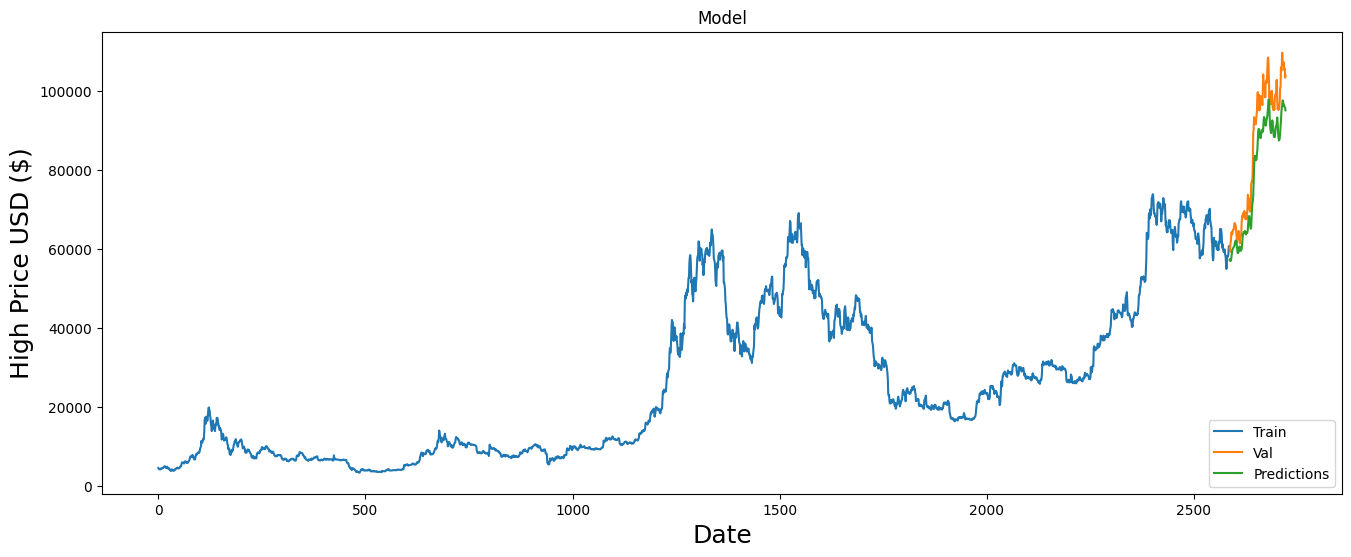

In [17]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('High Price USD ($)', fontsize=18)
plt.plot(train['high'])
plt.plot(valid[['high', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [18]:
# Show the valid and predicted prices
valid

,high,Predictions
2586,60395.80,57162.281250
2587,59210.70,57312.527344
2588,61320.00,56839.074219
2589,61786.24,56995.371094
2590,63850.00,57430.582031
...,...,...
2717,107120.00,96148.539062
2718,105286.52,96168.320312
2719,105500.00,95778.453125
2720,103260.00,95673.835938


In [19]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta

def predict_next_n_days(model, last_sequence, scaler, start_date=None, n_days=5):
    """
    Predict the next n days of prices using the trained model
    
    Parameters:
    model: trained LSTM model
    last_sequence: last 60 days of scaled data
    scaler: fitted MinMaxScaler object
    start_date: starting date for predictions (defaults to today if None)
    n_days: number of days to predict (default 5)
    
    Returns:
    DataFrame with dates and predicted prices
    """
    # Make a copy of the last sequence
    curr_sequence = last_sequence.copy()
    
    # List to store predictions
    future_predictions = []
    
    # Use provided start date or today's date
    if start_date is None:
        start_date = pd.Timestamp.today()  # Current date
    else:
        start_date = pd.to_datetime(start_date)
    
    # Predict n days
    for i in range(n_days):
        # Get prediction for next day
        curr_sequence_reshaped = curr_sequence.reshape((1, curr_sequence.shape[0], 1))
        predicted_price = model.predict(curr_sequence_reshaped)
        
        # Store the prediction
        future_predictions.append(predicted_price[0, 0])
        
        # Update sequence by removing first element and adding the predicted value
        curr_sequence = np.roll(curr_sequence, -1)
        curr_sequence[-1] = predicted_price
    
    # Create dates for predictions starting from the day after start_date
    future_dates = [start_date + timedelta(days=x+1) for x in range(n_days)]
    
    # Convert predictions back to original scale
    predictions_unscaled = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))
    
    # Create DataFrame with predictions
    future_predictions_df = pd.DataFrame(
        predictions_unscaled,
        index=future_dates,
        columns=['Predicted_Price']
    )
    
    return future_predictions_df

# Usage example:
# Get the last x days of scaled data
last_x_days = scaled_data[-countrows:]

# Reshape the data
last_x_days_scaled = last_x_days.reshape((countrows, 1))

# Get today's date in the format MM-DD-YYYY
today_date = datetime.today().strftime("%m-%d-%Y")

# Make predictions for the next 5 days starting from today
future_predictions = predict_next_n_days(
    model=model,
    last_sequence=last_x_days_scaled,
    scaler=scaler,
    start_date=today_date,
    n_days=5
)


# Print the predictions
print("\nPredicted prices for the next 5 days:")
print(future_predictions)

1/1 [==============================] - 0s 371ms/step

Predicted prices for the next 5 days:
            Predicted_Price
2025-01-30     94781.156250
2025-01-31     91650.593750
2025-02-01     88124.710938
2025-02-02     84855.835938
2025-02-03     82089.484375


In [20]:
# Define the Mean Absolute Error (MAE)
MAE = round(mae, 2)  # Replace with the actual MAE value if known

# Add Max and Min columns
future_predictions['Max'] = future_predictions['Predicted_Price'] + MAE
future_predictions['Min'] = future_predictions['Predicted_Price'] - MAE

# Print the updated DataFrame
print("\nPredicted prices with Max and Min for the next 5 days:")
print(future_predictions)


Predicted prices with Max and Min for the next 5 days:
            Predicted_Price            Max           Min
2025-01-30     94781.156250  101977.328125  87584.984375
2025-01-31     91650.593750   98846.765625  84454.421875
2025-02-01     88124.710938   95320.882812  80928.539062
2025-02-02     84855.835938   92052.007812  77659.664062
2025-02-03     82089.484375   89285.656250  74893.312500
